In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Exploratory Data Analysis

In [16]:
# Step 1: Read the dataset and basic dataframe exploration
df = pd.read_csv('insurance_data.csv')

In [17]:
print("Step 1: Basic DataFrame Exploration")

Step 1: Basic DataFrame Exploration


In [18]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [19]:
df.tail()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87
1339,1339,1340,30.0,female,47.4,101,No,0,Yes,southeast,63770.43


In [20]:
# observations:
# there are a mix of numeric and category columns.
# there are missing values
# label column is claim

In [21]:
df.shape

(1340, 11)

In [22]:
# ML models require examples i.e. rows. A good thumb rule to use is 100 rows per column. Our dataset fits that.

In [23]:
df.dtypes

index              int64
PatientID          int64
age              float64
gender            object
bmi              float64
bloodpressure      int64
diabetic          object
children           int64
smoker            object
region            object
claim            float64
dtype: object

In [24]:
# some columns require encoding as they are categorical

In [25]:
print(df.columns)

Index(['index', 'PatientID', 'age', 'gender', 'bmi', 'bloodpressure',
       'diabetic', 'children', 'smoker', 'region', 'claim'],
      dtype='object')


In [26]:
# Step 2: Summary statistics of numeric columns

In [27]:
print("\nStep 2: Summary Statistics of Numeric Columns")
df.describe()


Step 2: Summary Statistics of Numeric Columns


,index,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,669.500000,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,0.000000,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,334.750000,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,669.500000,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1004.250000,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1339.000000,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


In [28]:
# 1340 rows in the dataset. Age has 5 missing values.
# claim column has wide range. may have outliers.

In [29]:
# Step 3: Value counts of category columns

In [30]:
# include one for each column:
df.gender.value_counts()

gender
male      678
female    662
Name: count, dtype: int64

In [31]:
df.diabetic.value_counts()

diabetic
No     698
Yes    642
Name: count, dtype: int64

In [32]:
df.smoker.value_counts()

smoker
No     1066
Yes     274
Name: count, dtype: int64

In [33]:
# Step 4: Data Visualization

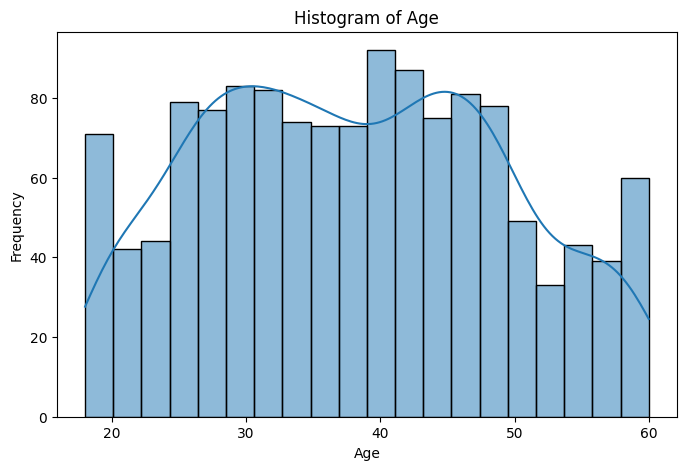

In [34]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

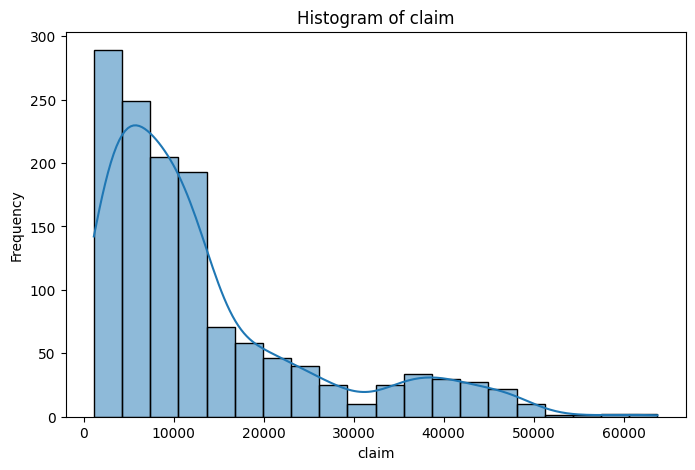

In [35]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['claim'], bins=20, kde=True)
plt.title('Histogram of claim')
plt.xlabel('claim')
plt.ylabel('Frequency')
plt.show()

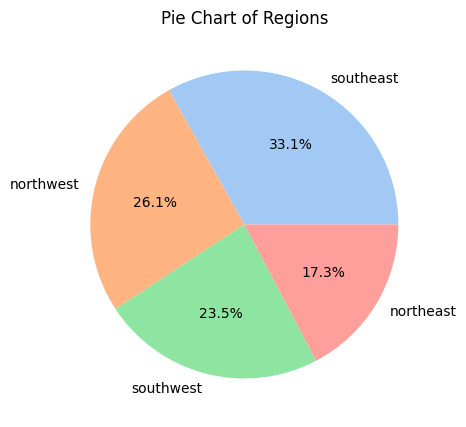

In [36]:
# Univariate Pie Chart
plt.figure(figsize=(8, 5))
df['region'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Regions')
plt.ylabel('')
plt.show()

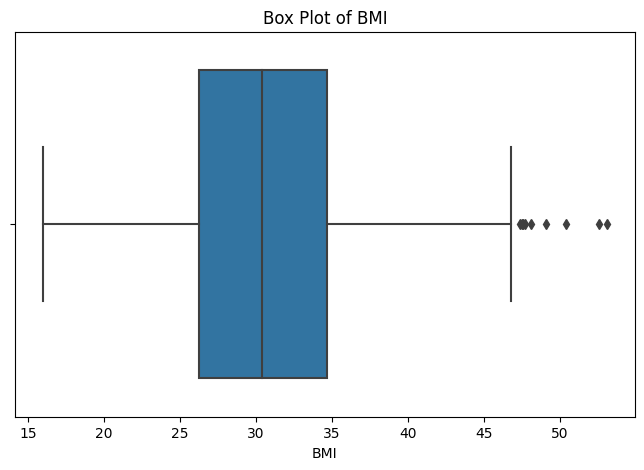

In [37]:
# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['bmi'])
plt.title('Box Plot of BMI')
plt.xlabel('BMI')
plt.show()

In [38]:
# shows some outliers in BMI column

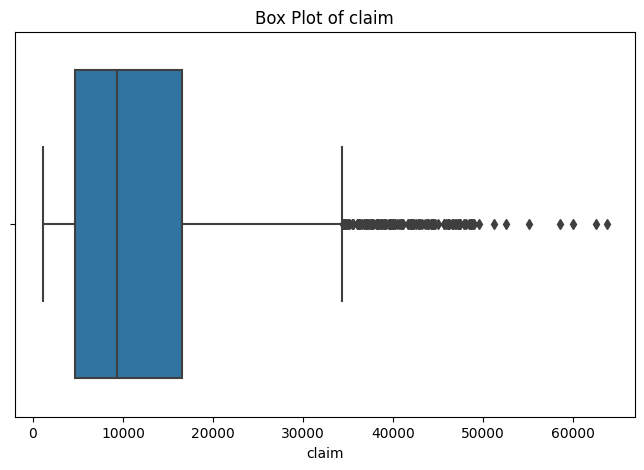

In [39]:
# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['claim'])
plt.title('Box Plot of claim')
plt.xlabel('claim')
plt.show()

<Axes: xlabel='age', ylabel='claim'>

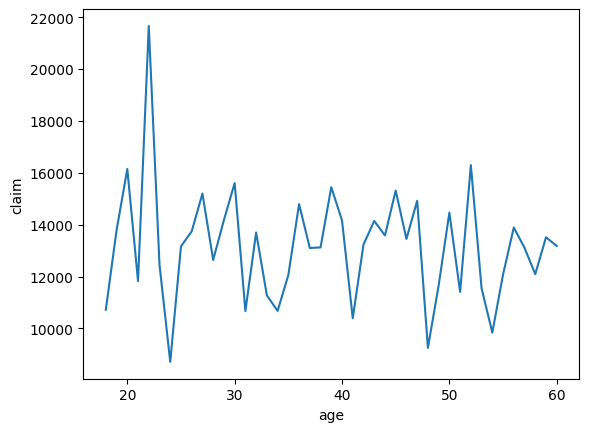

In [40]:
# Bivariate Line Plot
sns.lineplot(x='age', y='claim', data=df, errorbar=None)

<Axes: xlabel='bmi', ylabel='claim'>

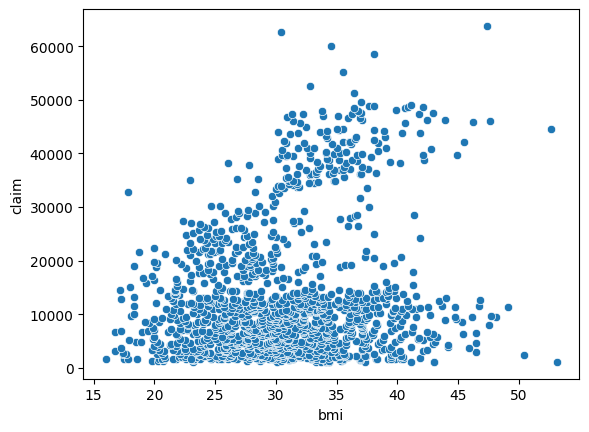

In [41]:
sns.scatterplot(x='bmi', y='claim', data=df)

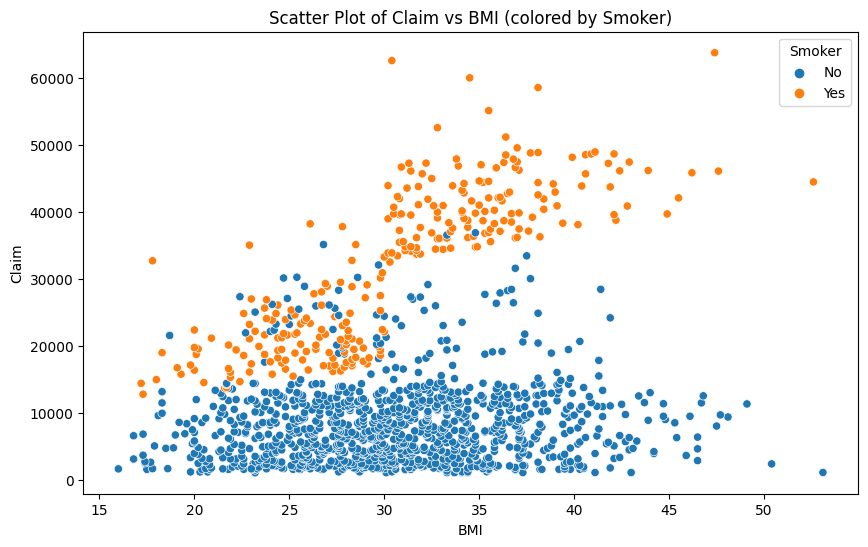

In [42]:
# Bivariate Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='claim', hue='smoker', data=df)
plt.title('Scatter Plot of Claim vs BMI (colored by Smoker)')
plt.xlabel('BMI')
plt.ylabel('Claim')
plt.legend(title='Smoker')
plt.show()

In [43]:
# Step 5: Observations from data visualization
# - There are ID columns which need to be removed
# - There are missing values that require rows to be dropped
# - Outliers require rows to be trimmed
# - Age seems to have a normal distribution with most values clustered around the mean.
# - Region is categorical with four distinct values, and the proportions are relatively balanced.
# - BMI shows some outliers towards the higher end of the distribution.
# - Claim amount is positively correlated with age but seems to have a wider spread for smokers.

# Data Preprocessing

In [44]:
# Step 1: Remove ID columns - index and PatientID
df = df.drop(columns=['index', 'PatientID'])

In [45]:
df.shape

(1340, 9)

In [46]:
# Step 2: Remove rows with missing values
df = df.dropna()

In [47]:
df.shape

(1332, 9)

In [48]:
# Step 3: Split numeric columns into X
X = df.drop('claim', axis=1)
X_num = X.select_dtypes(include=['int64', 'float64'])

In [49]:
# outlier filter

# get thresholds for outlier
Q1 = X_num.quantile(0.25)
Q3 = X_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Construct the outlier filter for X_num
outlier_filter = ~((X_num < lower_bound) | (X_num > upper_bound)).any(axis=1)

# Remove outliers from 'df' using this filter
df = df[outlier_filter]  # Remove rows with outliers from 'df'

# From the outlier trimmed df, fetch label, numeric features and category features for further processing
# notice the order of these lines
y = df['claim']
X = df.drop('claim', axis=1)
X_num = X.select_dtypes(include=['int64', 'float64'])
X_cat = df.select_dtypes(include=['object'])

In [50]:
X_num.shape, X_cat.shape

((1263, 4), (1263, 4))

In [51]:
# Step 4: Rescale numeric columns (optional, based on the algorithm used)
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)
# Convert the scaled numpy array back to a DataFrame
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

In [52]:
# alt way of achieving the same result as the previous cell. here we create a copy of X_num and overwrite it with scaled values
# what is happening is the index i.e. row IDs are retained implicitly versus in the above cell we are handling that explicitly.

#X_num_scaled = X_num.copy()
#scaler = MinMaxScaler()
#X_num_scaled[X_num.columns] = scaler.fit_transform(X_num)

In [53]:
# Step 5: One-hot encode category columns
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)  # Drop_first to avoid multicollinearity

In [54]:
# Step 6: Merge df_num and df_cat_encoded into X
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [55]:
X.shape

(1263, 14)

In [56]:
# Step 7: Check for NA in X and y; Check for shape compatibility
print("\nStep 7: Checking for NAs and Shape Compatibility")
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)


Step 7: Checking for NAs and Shape Compatibility
age                 0
bmi                 0
bloodpressure       0
children            0
gender_female       0
gender_male         0
diabetic_No         0
diabetic_Yes        0
smoker_No           0
smoker_Yes          0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64
0
(1263, 14)
(1263,)


In [57]:
X.describe()

,age,bmi,bloodpressure,children,gender_female,gender_male,diabetic_No,diabetic_Yes,smoker_No,smoker_Yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000
mean,0.477604,0.456723,0.327145,0.221536,0.501188,0.498812,0.520982,0.479018,0.826603,0.173397,0.170230,0.266033,0.326207,0.237530
std,0.265454,0.189505,0.221176,0.242893,0.500197,0.500197,0.499757,0.499757,0.378740,0.378740,0.375983,0.442057,0.469010,0.425738
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.261905,0.317460,0.157895,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.452381,0.447619,0.315789,0.200000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.690476,0.579365,0.473684,0.400000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [202]:
# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [203]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(1010, 10)
(253, 10)
(1010,)
(253,)


In [204]:
# Step 9: Observations after preprocessing
# - ID columns have been removed.
# - Rows with missing values have been removed.
# - Numeric and categorical features have been separated into X and y, respectively.
# - Numeric columns have been rescaled (if required, this step is optional based on the algorithm used).
# - Category columns have been one-hot encoded to be used in the model.
# - The dataset has been split into train and test sets for model evaluation.

# we are ready to fit ML models to train and evaluate using test

In [205]:
X.to_csv('insurance_claim_features.csv', index=False)
y.to_csv('insurance_claim_label.csv',index=False)